In [1]:
import matplotlib.pyplot as plt
import h5py
from numpy import *
import numpy as np

In [2]:
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Times']})

In [7]:
snapshot = 'bojo20_200/snapshot_065.hdf5'

f = h5py.File(snapshot, 'r')

print(list(f.keys()))

['Config', 'Header', 'Parameters', 'PartType1', 'PartType2', 'PartType3']


In [8]:
f['Header'].attrs['Time']

3.251953125

In [5]:
#f_gas = f['PartType0']
f_dm = f['PartType1']
f_disk = f['PartType2']
#f_star = f['PartType4']

In [6]:
print(list(f_dm.keys()))

['Coordinates', 'Masses', 'ParticleIDs', 'Velocities']


In [7]:
x = np.array(f_disk['Coordinates'][:,0])
y = np.array(f_disk['Coordinates'][:,1])
z = np.array(f_disk['Coordinates'][:,2])
m = np.array(f_disk['Masses'])

In [8]:
N_disk = np.array(f_disk['ParticleIDs'])
print(N_disk)
len(N_disk)

[1131204 1127627 1128047 ... 1057860 1057570 1116719]


200000

In [9]:
#print(list(f_disk.keys()))

disk_x = np.array(f['PartType2']['Coordinates'][:,0])
disk_y = np.array(f['PartType2']['Coordinates'][:,1])

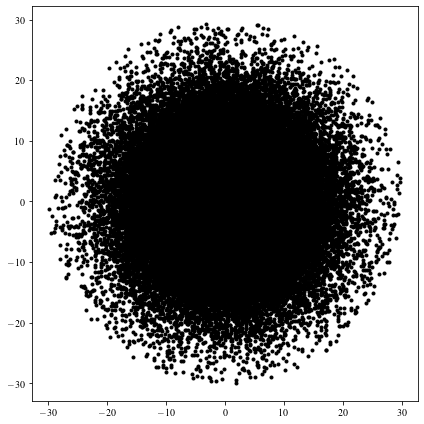

In [10]:
fig, axs = plt.subplots(1, figsize=(6, 6), sharey=True)
axs.scatter(disk_x, disk_y, label= '', marker=".", color='black')

plt.tight_layout()
#name = 'teste.png'
#plt.savefig(name)